# **Problem Statement:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Recurrent neural network (RNN) Use the Google stock prices dataset and design a time seriesanalysis and prediction system using RNN.

Import the libraries:

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# **Loading the dataset:**

In [3]:
dataset_train = pd.read_csv("/content/drive/MyDrive/DL practicals/trainset.csv")

In [4]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


# **EDA**

Preprocessing of data:

In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
dataset_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [7]:
dataset_train.any()

Date         True
Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [8]:
dataset_train.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


# **Feature Engineering:**

In [10]:
trainset = dataset_train.iloc[:,1:2].values

In [11]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

# **Model Building/ training and testing:**

In [13]:
x_train = []
y_train = []

In [14]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(1198, 60, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1)))

In [18]:
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(Dense(units = 1))

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
# regressor.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [27]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [28]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38/38 [==============================] - 33s 867ms/step - loss: 0.0348
Epoch 2/10
38/38 [==============================] - 33s 874ms/step - loss: 0.0054
Epoch 3/10
38/38 [==============================] - 33s 871ms/step - loss: 0.0047
Epoch 4/10
38/38 [==============================] - 33s 863ms/step - loss: 0.0053
Epoch 5/10
38/38 [==============================] - 32s 849ms/step - loss: 0.0046
Epoch 6/10
38/38 [==============================] - 33s 855ms/step - loss: 0.0042
Epoch 7/10
38/38 [==============================] - 33s 860ms/step - loss: 0.0047
Epoch 8/10
38/38 [==============================] - 33s 862ms/step - loss: 0.0047
Epoch 9/10
38/38 [==============================] - 33s 870ms/step - loss: 0.0039
Epoch 10/10
38/38 [==============================] - 32s 850ms/step - loss: 0.0038


In [29]:
dataset_test =pd.read_csv("/content/drive/MyDrive/DL practicals/testset.csv")

In [30]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [31]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [32]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [33]:
inputs = inputs.reshape(-1,1)

In [34]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [35]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [36]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [37]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [38]:
x_test = np.reshape(x_test, (x_test.shape + (1,)))
x_test.shape

(125, 60, 1)

# **Evaluating Model:**

In [39]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 444ms/step


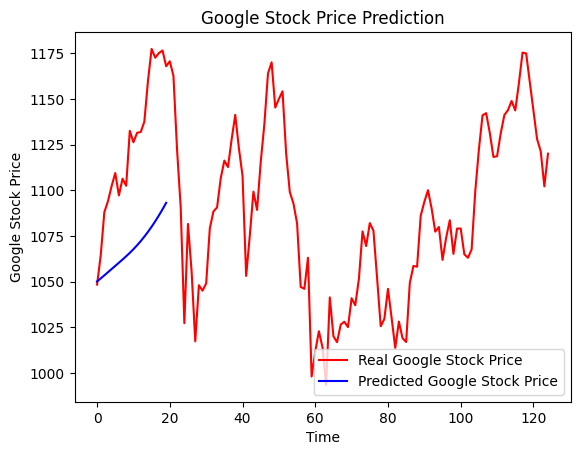

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()